In [1]:
%autosave 0
from IPython.core.display import HTML, display
display(HTML('<style>.container { width:100% !important; } </style>'))

Autosave disabled


# Logistic Regression with SciKit-Learn

In [2]:
import numpy  as np
import pandas as pd

The data we want to investigate is stored in the file `'exam.csv'`.  The first column of this file is an integer from the set $\{0,1\}$.  The nuber is $0$ if the corresponding student has failed the exam and is $1$ otherwise.  The second column is a floating point number that lists the number of hours that the student has studied.

In [3]:
ExamDF = pd.read_csv('exam.csv')
ExamDF

,Pass,Hours
0,0,0.50
1,0,0.75
2,0,1.00
3,0,1.25
4,0,1.50
5,0,1.75
6,1,1.75
7,0,2.00
8,1,2.25
9,0,2.50


We extract the data from the data frame and convert it into `NumPy` arrays.

In [4]:
X = np.array(ExamDF['Hours'])
Y = np.array(ExamDF['Pass'], dtype=float)

To proceed, we will plot the data points.  To this end we transform the lists `Pass` and `Hours` into numpy arrays.

In [5]:
import matplotlib.pyplot as plt
import seaborn           as sns

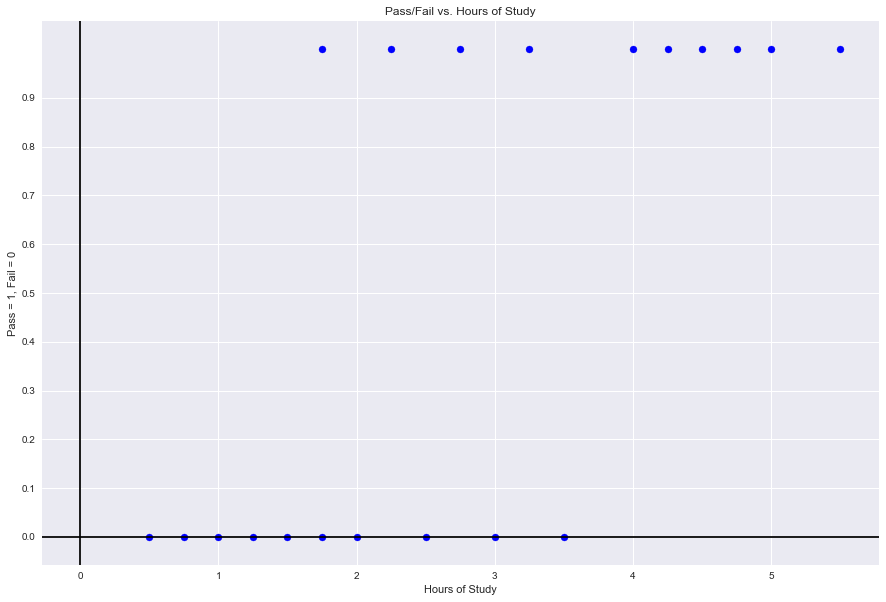

In [6]:
plt.figure(figsize=(15, 10))
sns.set(style='darkgrid')
plt.title('Pass/Fail vs. Hours of Study')
plt.axvline(x=0.0, c='k')
plt.axhline(y=0.0, c='k')
plt.xlabel('Hours of Study')
plt.ylabel('Pass = 1, Fail = 0')
plt.yticks(np.arange(-0.0, 1.0, step=0.1))
plt.scatter(X, Y, color='b')

The number of students is stored in the variable `n`.

In [7]:
n = len(Y)
n

20

We have to turn the vector `X` into the feature matrix `X`.

In [8]:
X = np.reshape(X, (n,1))

We import the module `linear_model` from SciKit-Learn.

In [9]:
import sklearn.linear_model as lm

We built a <em style="color:blue;">logistic regression</em> model.   The first parameter `C` is the so called <em style="color:blue;">regularization</em> parameter.  If we set it too a hight value, then we do not regularize.  The second parameter `tol` is the <em style="color:blue;">tolerance</em>.  It specifies when gradient descent should stop.  

In [10]:
model = lm.LogisticRegression(C = 10000, tol=1e-9)

Next, we train the model with the data we have.

In [11]:
M = model.fit(X, Y)

We extract the paramters that we have learned.

In [12]:
ϑ0 = M.intercept_[0]
ϑ1 = M.coef_[0][0]
ϑ0, ϑ1

(-4.076294152977267, 1.5041644276201385)

According to the model we have learned, the probability $P(h)$ that a student, who has learned for $h$ hours, will pass the exam, is given as
$$ P(h) = S(\vartheta_0 + \vartheta_1 \cdot h) $$
In order to plot this function, we have to define the sigmoid function $S(t) := \large \frac{1}{1 + \exp(-t)}$.

In [13]:
def sigmoid(t):
    return 1.0 / (1.0 + np.exp(-t))

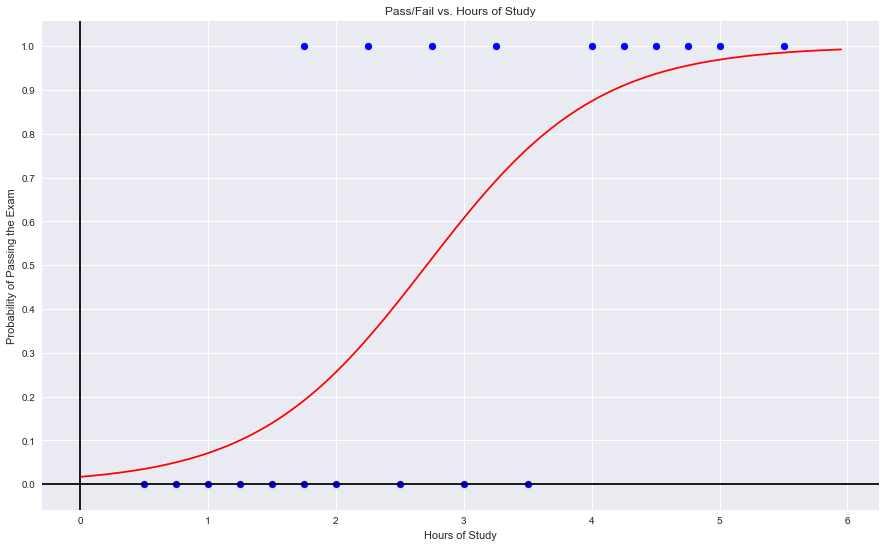

In [14]:
plt.figure(figsize=(15, 9))
sns.set(style='darkgrid')
plt.title('Pass/Fail vs. Hours of Study')
H = np.arange(0.0, 6.0, 0.05)
P = sigmoid(ϑ0 + ϑ1 * H)
plt.plot(H, P, color='r')
plt.axvline(x=0.0, c='k')
plt.axhline(y=0.0, c='k')
plt.xlabel('Hours of Study')
plt.ylabel('Probability of Passing the Exam')
plt.yticks(np.arange(-0.0, 1.01, step=0.1))
plt.scatter(X, Y, color='b')

In [15]:
errors   = np.sum(np.abs(Y - model.predict(X)))
accuracy = (n - errors) / n
accuracy

0.8

We are able to predict $80\%$ of the results correctly.